In [13]:
from netCDF4 import Dataset #Reading NetCDF files
import numpy as np
import xarray as xr
import sys
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.path as mpath
import matplotlib.pyplot as plt
from matplotlib import *
from pylab import *
import matplotlib.ticker as mticker
from matplotlib.animation import FuncAnimation


ds = xr.open_dataset("/erai/1988/g.1988.nc",decode_times=False)
ds.g

<xarray.DataArray 'g' (time: 1464, lev: 37, lat: 256, lon: 512)>
[7099908096 values with dtype=float32]
Coordinates:
  * time     (time) float64 1.648e+06 1.648e+06 ... 1.657e+06 1.657e+06
  * lev      (lev) int32 1000 975 950 925 900 875 850 825 ... 30 20 10 7 5 3 2 1
  * lat      (lat) float32 -89.46282 -88.76695 -88.06697 ... 88.76695 89.46282
  * lon      (lon) float32 0.0 0.70312524 1.4062505 ... 358.59387 359.297
Attributes:
    center:                   European Center for Medium-Range Weather Foreca...
    long_name:                Geopotential Height
    units:                    gpm
    level_indicator:          100
    gds_grid_type:            4
    parameter_table_version:  128
    parameter_number:         129
    forecast_time:            0
    forecast_time_units:      hours

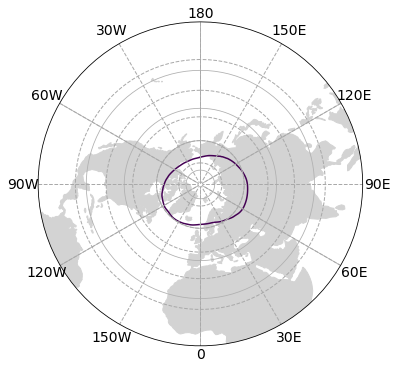

In [8]:
fig = plt.figure(figsize=[10, 5])
ax = plt.subplot(1, 1, 1, projection=ccrs.NorthPolarStereo())
fig.subplots_adjust(bottom=0.05, top=0.95,
                    left=0.04, right=0.95, wspace=0.02)

# Limit the map to 40 degrees latitude and below.
ax.set_extent([-180, 180, 0, 40], ccrs.PlateCarree())

ax.add_feature(cfeature.LAND,facecolor='lightgray')


ax.gridlines()


# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)

#from NCl, messing with grid lines to produce manipulated longitudes and latitudes
gl = ax.gridlines(ccrs.PlateCarree(),
                  draw_labels=False,
                  linestyle="--",
                  linewidth=1,
                  color='darkgray',
                  zorder=2)
gl.ylocator = mticker.FixedLocator(np.arange(0, 90, 15))
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))

ticks = np.arange(0, 210, 30)
etick = ['0'] + [
    r'%dE' % tick for tick in ticks if (tick != 0) & (tick != 180)
] + ['180']
wtick = [r'%dW' % tick for tick in ticks if (tick != 0) & (tick != 180)]
labels = etick + wtick
xticks = np.arange(0, 360, 30)
yticks = np.full_like(xticks, -5)  # Latitude where the labels will be drawn
for xtick, ytick, label in zip(xticks, yticks, labels):
    if label == '180':
        ax.text(xtick,
                ytick,
                label,
                fontsize=14,
                horizontalalignment='center',
                verticalalignment='top',
                transform=ccrs.Geodetic())
    elif label == '0':
        ax.text(xtick,
                ytick,
                label,
                fontsize=14,
                horizontalalignment='center',
                verticalalignment='bottom',
                transform=ccrs.Geodetic())
    else:
        ax.text(xtick,
                ytick,
                label,
                fontsize=14,
                horizontalalignment='center',
                verticalalignment='center',
                transform=ccrs.Geodetic())

#####################################
#now, begin plotting data
#start with the 0th time step

p = ds.isel(time=0,lev=31).g
lat = ds.lat
lon = ds.lon

#contours based on min and max values of g from this year
ax.contour(lon,lat,p,np.arange(24000,33000,200),levels =[29800], transform=ccrs.PlateCarree())

30674.426
timestep 0


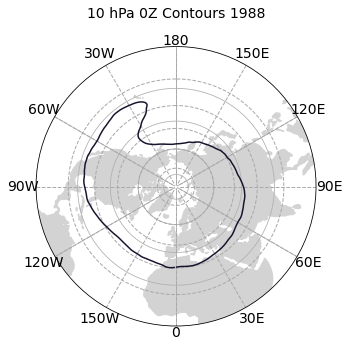

In [24]:
##now let's plot the first week of data

attempt = [x for x in range(0,len(np.array(ds.isel(lev=31).g)),4)]

fig = plt.figure(figsize=[10, 5])
ax = plt.subplot(1, 1, 1, projection=ccrs.NorthPolarStereo())
fig.subplots_adjust(bottom=0.05, top=0.95,
                    left=0.04, right=0.95, wspace=0.02)

# Limit the map to 40 degrees latitude and below.
ax.set_extent([-180, 180, 0, 40], ccrs.PlateCarree())

ax.add_feature(cfeature.LAND,facecolor='lightgray')


ax.gridlines()


# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)

#from NCl, messing with grid lines to produce manipulated longitudes and latitudes
gl = ax.gridlines(ccrs.PlateCarree(),
                  draw_labels=False,
                  linestyle="--",
                  linewidth=1,
                  color='darkgray',
                  zorder=2)
gl.ylocator = mticker.FixedLocator(np.arange(0, 90, 15))
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))

ticks = np.arange(0, 210, 30)
etick = ['0'] + [
    r'%dE' % tick for tick in ticks if (tick != 0) & (tick != 180)
] + ['180']
wtick = [r'%dW' % tick for tick in ticks if (tick != 0) & (tick != 180)]
labels = etick + wtick
xticks = np.arange(0, 360, 30)
yticks = np.full_like(xticks, -5)  # Latitude where the labels will be drawn
for xtick, ytick, label in zip(xticks, yticks, labels):
    if label == '180':
        ax.text(xtick,
                ytick,
                label,
                fontsize=14,
                horizontalalignment='center',
                verticalalignment='top',
                transform=ccrs.Geodetic())
    elif label == '0':
        ax.text(xtick,
                ytick,
                label,
                fontsize=14,
                horizontalalignment='center',
                verticalalignment='bottom',
                transform=ccrs.Geodetic())
    else:
        ax.text(xtick,
                ytick,
                label,
                fontsize=14,
                horizontalalignment='center',
                verticalalignment='center',
                transform=ccrs.Geodetic())

plt.title("10 hPa 0Z Contours 1988",fontsize = 14, y=1.08)
plt.tight_layout()
avg = np.array(np.mean(ds.isel(lev=31).g))
print(avg)


def update(j):
    label = 'timestep {0}'.format(j)
    print(label)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    #if j == 0:
        #ax.contour(lon,lat,ds.isel(time=attempt[0],lev=31).g,levels =[avg], transform=ccrs.PlateCarree(),colors=['#1B132E'])
    #if j > 0:
        #ax.contour(lon,lat,ds.isel(time=attempt[j-1],lev=31).g,levels =[avg], transform=ccrs.PlateCarree(), colors=['#A0A0A0'])
    ax.contour(lon,lat,ds.isel(time=attempt[j],lev=31).g,levels =[avg], transform=ccrs.PlateCarree(), colors=['#1B132E'])
    return ax

#####################################
#now, begin plotting data
#start with the 0th time step


if __name__ == '__main__':
    # FuncAnimation will call the 'update' function for each frame; here
    # animating over 10 frames, with an interval of 200ms between frames.
    
    lat = ds.lat
    lon = ds.lon
    
    anim = FuncAnimation(fig, update, frames=np.arange(0, 365), interval=200)
    if len(sys.argv) > 1 and sys.argv[1] == 'save':
        anim.save('line.gif', dpi=80, writer='imagemagick')
    else:
    # plt.show() will just loop the animation forever.
        plt.show()

